In [ ]:
import numpy as np
import pandas as pd
import lifelines as lif

churn=pd.read_csv("/content/drive/MyDrive/internet_service_churn.csv")

In [ ]:
churn["id"].tail()

72269    1689648
72270    1689676
72271    1689679
72272    1689733
72273    1689744
Name: id, dtype: int64

In [ ]:
churn.fillna(0,inplace=True)


In [ ]:
df_train=churn[churn["id"]>506919]
df_test=churn[churn["id"]<506919]

In [ ]:
1689733*30/100 #porcentagem

506919.9

In [ ]:
df_train.tail()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1
72273,1689744,1,1,0.01,0,0.82,0,0.0,0.0,0,1


In [ ]:
cox=lif.CoxPHFitter()
cox.fit(churn,duration_col="id",event_col="churn",
        formula="subscription_age+is_tv_subscriber+is_movie_package_subscriber+bill_avg+reamining_contract+service_failure_count+download_avg+upload_avg+download_over_limit")

<lifelines.CoxPHFitter: fitted with 72274 total observations, 32224 right-censored observations>

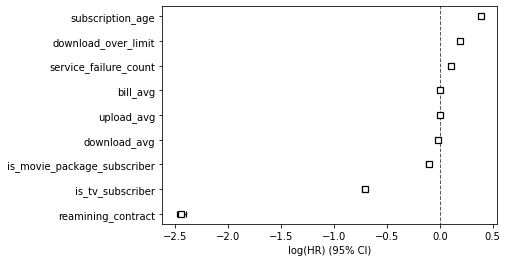

In [ ]:
cox.plot()

In [ ]:
cox.print_summary()

<lifelines.CoxPHFitter: fitted with 72274 total observations, 32224 right-censored observations>
             duration col = 'id'
                event col = 'churn'
      baseline estimation = breslow
   number of observations = 72274
number of events observed = 40050
   partial log-likelihood = -385993.03
         time fit was run = 2022-07-18 22:55:12 UTC

---
                              coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                           
bill_avg                      0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
download_avg                 -0.01       0.99       0.00            -0.01            -0.01                 0.99                 0.99
download_over_limit           0.19       1.21       0.00             0.18             0.20                 1.20                 1.22
is_movie_package_subscriber  -0.11       0.90       0.01            -0.13            -0.08                 0.88                 0.92
is_tv_subscriber             -0.71       0.49       0.01            -0.73            -0.69                 0.48                 0.50
reamining_contract           -2.44       0.09       0.02            -2.48            -2.40                 0.08                 0.09
service_failure_count         0.11       1.11       0.01             0.10             0.12                 1.10                 1.12
subscription_age              0.39       1.47       0.00             0.38             0.39                 1.46                 1.48
upload_avg                    0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00

                              cmp to       z      p   -log2(p)
covariate                                                     
bill_avg                        0.00    1.70   0.09       3.48
download_avg                    0.00  -69.48 <0.005        inf
download_over_limit             0.00   46.20 <0.005        inf
is_movie_package_subscriber     0.00   -7.96 <0.005      49.01
is_tv_subscriber                0.00  -58.20 <0.005        inf
reamining_contract              0.00 -122.82 <0.005        inf
service_failure_count           0.00   19.23 <0.005     271.35
subscription_age                0.00  114.46 <0.005        inf
upload_avg                      0.00    0.73   0.47       1.10
---
Concordance = 0.86
Partial AIC = 772004.07
log-likelihood ratio test = 71061.33 on 9 df
-log2(p) of ll-ratio test = inf

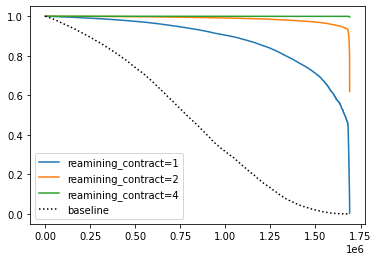

In [ ]:
cox.plot_partial_effects_on_outcome(covariates="reamining_contract",values=[1,2,4])